In [14]:
import pickle
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
np.random.seed(0)

In [15]:
with open('./data/test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [16]:
test_data=np.array(test_data)
test_x=test_data[:,0]
test_y=test_data[:,1]


In [17]:
with open('./data/train.pkl', 'rb') as f2:
    train_data = pickle.load(f2)

In [18]:
train_data = np.array(train_data)
np.random.shuffle(train_data)
train_x=train_data[:,0]
train_y=train_data[:,1]
train_x=np.array(np.array_split(train_x,10))
train_y=np.array(np.array_split(train_y,10))
bias=[]
vari=[]
err=[]
ierr=[]

In [19]:
# outputs
output=[]
#loop through degrees
for degree in range(1,21):
    # loop through models
    output.append([])
    for i in range(10):
        x_train = PolynomialFeatures(degree=degree).fit_transform(train_x[i].reshape(-1,1))
        x_test = PolynomialFeatures(degree=degree).fit_transform(test_x.reshape(-1,1))
        curr_model = LinearRegression().fit(x_train,train_y[i])
        output[degree-1].append(curr_model.predict(x_test))

In [20]:
def bias_var():
    global bias
    global vari
    global err
    bias=[]
    vari=[]
    err=[]
    ierr=[]
    for degree in range(1,21):
        output_curr_degree= output[degree-1]
        output_curr_degree=np.array(output_curr_degree)
        mean_point_over_10 = np.mean(output_curr_degree, axis = 0)
        bias.append(np.mean((mean_point_over_10 - test_y)))
        var_point_over_10 = np.var(output_curr_degree, axis = 0)
        vari.append(np.mean(var_point_over_10))
        err_a= np.array(output_curr_degree)-np.array(test_y)
        err_a=np.square(err_a)
        err_mean = np.mean(err_a, axis=0)
        err.append(np.mean(err_mean))
        ierr.append(np.mean(err_mean -((mean_point_over_10 - test_y)**2)-var_point_over_10))
        
    table = pd.DataFrame({"Degree":np.array(range(1,21)),"Bias": bias,"Bias Square": np.array(bias)**2 ,"Variance": vari, "Mean Squared Error": err, "Irreducible Error": ierr})
    print(table.to_string(index=False))
    return table
        
    
    
    

In [21]:
table = bias_var()

 Degree        Bias   Bias Square       Variance  Mean Squared Error  Irreducible Error
      1  232.938143  54260.178471   33626.324421        1.038161e+06       9.115411e-11
      2  227.317209  51673.113699   50680.364455        1.008630e+06       8.885763e-11
      3  -10.955139    120.015077   59340.421971        6.678074e+04       1.223270e-11
      4   -4.235943     17.943213   77730.579366        8.452348e+04      -1.136868e-12
      5   -2.486978      6.185059   76505.423358        8.274028e+04       3.728928e-12
      6   -5.914107     34.976661  102423.781268        1.085341e+05       9.777068e-12
      7   -2.991117      8.946780  108209.206612        1.153238e+05      -2.046363e-12
      8   -7.683898     59.042295  111068.304751        1.185338e+05       8.731149e-12
      9   -5.169410     26.722801  127299.021720        1.345487e+05      -7.412382e-12
     10   -7.770495     60.380597  130217.786422        1.396987e+05       1.632543e-11
     11  -12.861906    165.42861

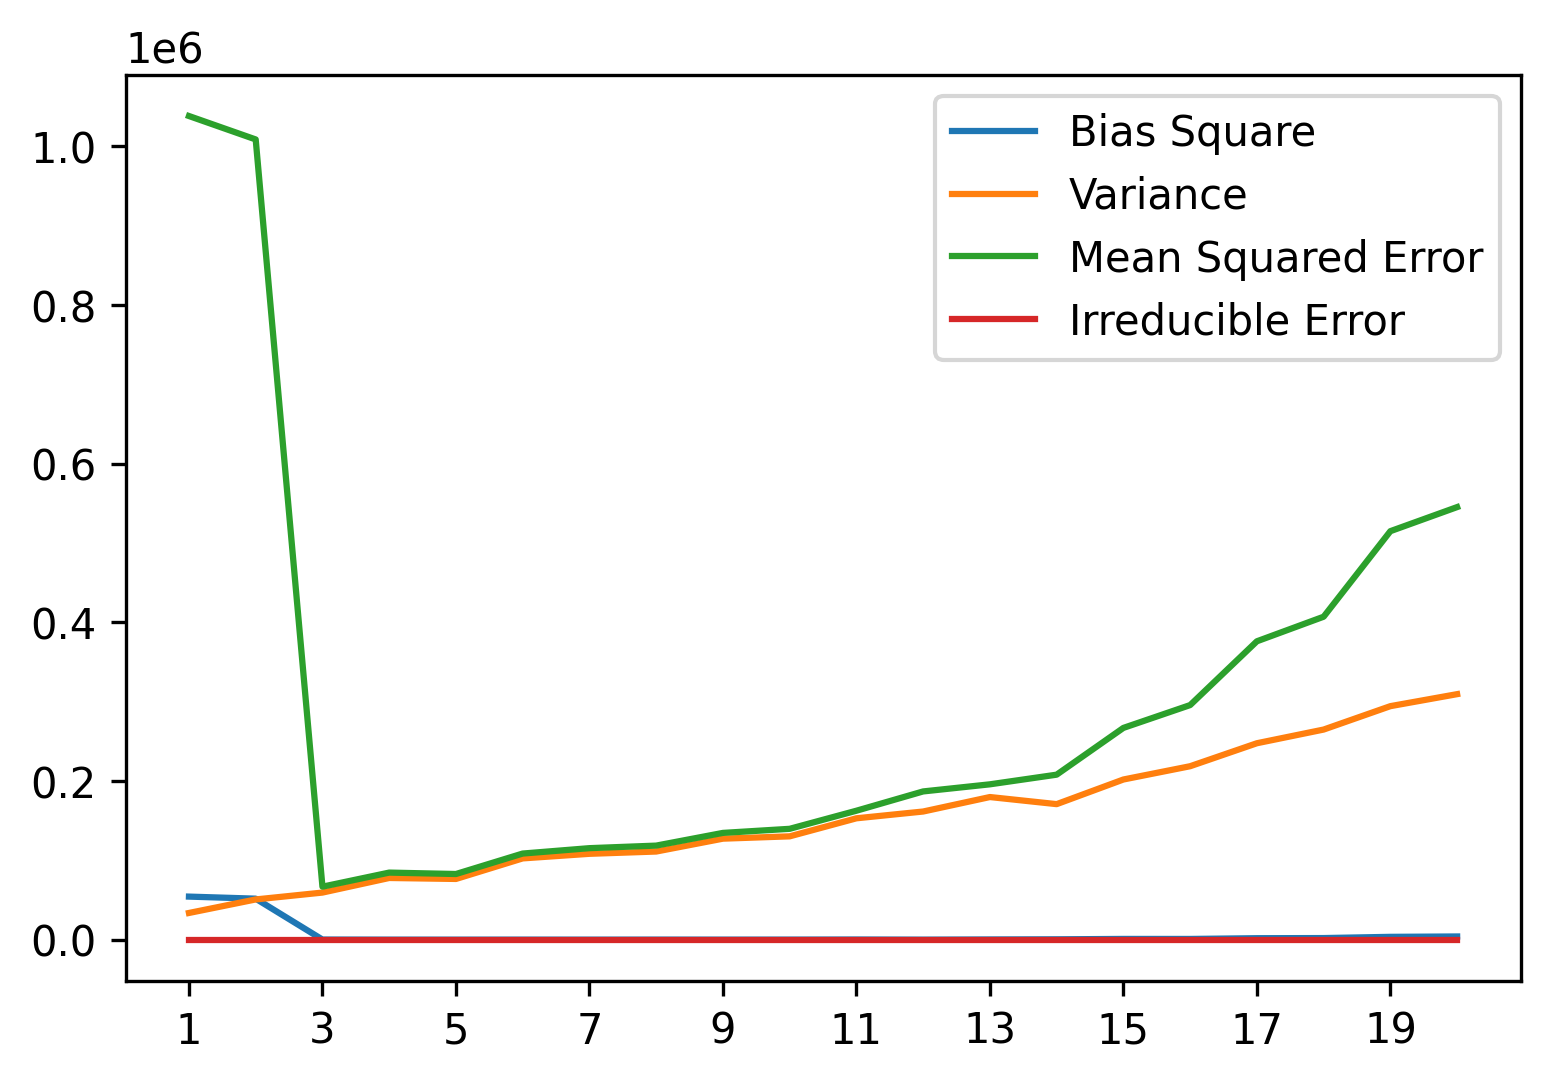

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.xticks(np.array(range(1,21,2)))
plt.plot(np.array(range(1,21)),table["Bias Square"].tolist(),label="Bias Square")
plt.plot(np.array(range(1,21)),table["Variance"].tolist(),label="Variance")
plt.plot(np.array(range(1,21)),table["Mean Squared Error"].tolist(), label="Mean Squared Error")
plt.plot(np.array(range(1,21)),table["Irreducible Error"].tolist(), label="Irreducible Error")
plt.legend()
plt.show()